# Chatbot
- [reference] https://python.langchain.com/v0.2/docs/tutorials/chatbot/

## Quickstart

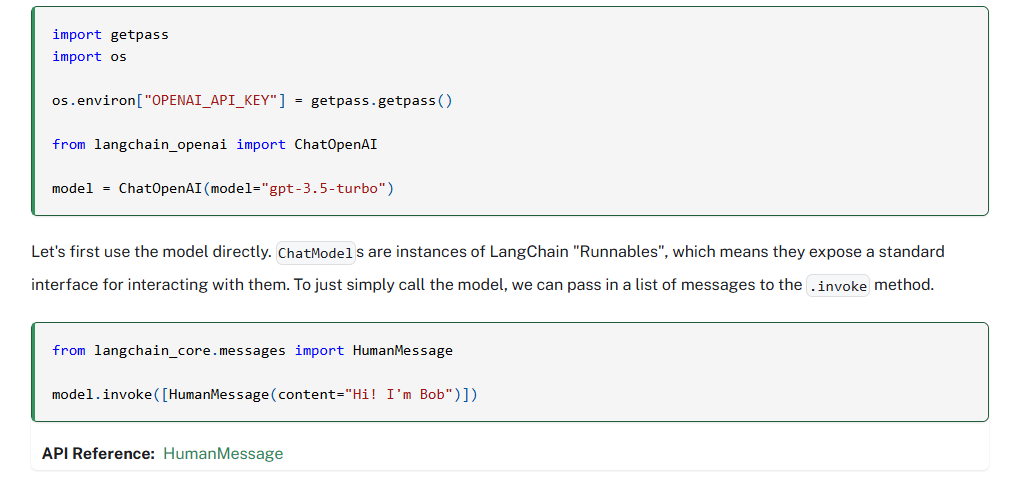

In [3]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv


In [4]:
load_dotenv()


True

In [ ]:
model = ChatOpenAI(model='gpt-4.1-nano')
model 


ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000025F8D962530>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000025F8D9752D0>, root_client=<openai.OpenAI object at 0x0000025F8D805EA0>, root_async_client=<openai.AsyncOpenAI object at 0x0000025F8D962590>, model_name='gpt-4.1-nano', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [13]:
ai_message = model.invoke([HumanMessage(content="Hi! I'm Bob")])

In [14]:
ai_message.content

'Hi Bob! Nice to meet you. How can I assist you today?'

In [15]:
ai_message_02 = model.invoke('What is my name?')
ai_message_02

AIMessage(content="I'm sorry, but I don't have that information.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_17d1f82c3e', 'id': 'chatcmpl-Bbk4vAgwaY3EDl7YAKbBd3H38iKYV', 'finish_reason': 'stop', 'logprobs': None}, id='run-183af047-68a8-4adb-b91a-bd8c289c7087-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [17]:
ai_message_03 = model.invoke([HumanMessage('What is my name?')])
ai_message_03

AIMessage(content="I'm sorry, but I don't know your name.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_17d1f82c3e', 'id': 'chatcmpl-BbkBDdRBL6byOGgGAm0YZIbYhOppL', 'finish_reason': 'stop', 'logprobs': None}, id='run-0a042e2c-be44-41d3-a348-f03475923672-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})